In [29]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import squarify

In [30]:
dataset = pd.read_excel('RFM ANALYSIS.xlsx')

In [31]:
dataset.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,property_valuation,Recency,Comparison date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Executive Secretary,Health,Mass Customer,Yes,11,2016,New South Wales,10,55,2017-01-01
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Administrative Officer,Financial Services,Mass Customer,Yes,16,2153,New South Wales,10,140,2017-01-01
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,Recruiting Manager,Property,Mass Customer,Yes,15,4211,QLD,9,288,2017-01-01
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,IT,Mass Customer,No,7,2448,New South Wales,4,242,2017-01-01
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Senior Editor,NaN,Affluent Customer,Yes,8,3216,VIC,9,273,2017-01-01


In [32]:
dataset.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,Profit,product_first_sold_date,past_3_years_bike_related_purchases,Recency
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,20000.000000,19803.000000,4000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,557.259560,38199.776549,48.890000,181.588950
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,497.290221,2875.201110,28.715005,105.363068
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,4.800000,33259.000000,0.000000,0.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,135.850000,35667.000000,24.000000,90.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,445.210000,38216.000000,48.000000,183.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,830.240000,40672.000000,73.000000,274.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,2086.070000,42710.000000,99.000000,363.000000


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [34]:
# --Group data by customerID--
# Create snapshot date
snapshot_date = dataset['transaction_date'].max() + timedelta(days=1)
print(snapshot_date)
# Grouping by CustomerID
data_process = dataset.groupby(['customer_id']).agg({
        'transaction_date': lambda x: (snapshot_date - x.max()).days,
        'product_id': 'count',
        'Profit': 'sum'})


2017-12-31 00:00:00


In [35]:
# Rename the columns 
data_process.rename(columns={'transaction_date': 'Recency',
                         'product_id': 'Frequency',
                         'Profit': 'MonetaryValue'}, inplace=True)

In [36]:
# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

             Recency  Frequency  MonetaryValue
customer_id                                   
1                  8         11        3018.09
2                129          3        2226.26
3                103          8        3362.81
4                196          2         220.57
5                 17          6        2394.94
3,494 rows; 3 columns


In [37]:
import seaborn as sns

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

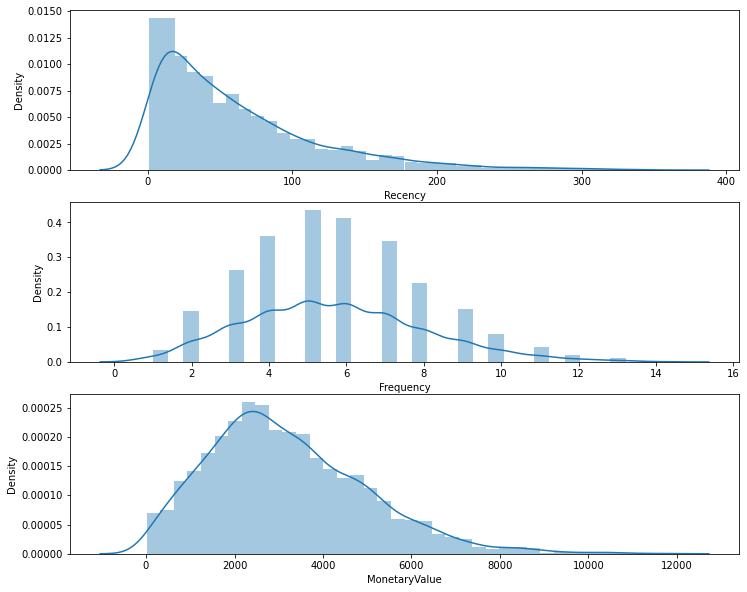

In [38]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])
# Show the plot
plt.show()

In [39]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
data_process = data_process.assign(R = r_groups.values, F = f_groups.values)
data_process.head()

,Recency,Frequency,MonetaryValue,R,F
customer_id,,,,,
1,8,11,3018.09,4,4
2,129,3,2226.26,1,1
3,103,8,3362.81,1,4
4,196,2,220.57,1,1
5,17,6,2394.94,4,2


In [40]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(data_process['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
data_process = data_process.assign(M = m_groups.values)

In [43]:
data= [data_process]#this convert float to integer

for dataset in data:
    dataset['MonetaryValue'] = dataset['MonetaryValue'].fillna(0)
    dataset['MonetaryValue'] = dataset['MonetaryValue'].astype(int)

In [44]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
data_process['RFM_Segment_Concat'] = data_process.apply(join_rfm, axis=1)
rfm = data_process
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
customer_id,,,,,,,
1,8,11,3018,4,4,3,443
2,129,3,2226,1,1,2,112
3,103,8,3362,1,4,3,143
4,196,2,220,1,1,1,111
5,17,6,2394,4,2,2,422


In [45]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

61


In [46]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

customer_id
1    11
2     4
3     8
4     3
5     8
Name: RFM_Score, dtype: int64


In [47]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [48]:
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
customer_id,,,,,,,,,
1,8,11,3018,4,4,3,443,11,Can't Loose Them
2,129,3,2226,1,1,2,112,4,Needs Attention
3,103,8,3362,1,4,3,143,8,Champions
4,196,2,220,1,1,1,111,3,Require Activation
5,17,6,2394,4,2,2,422,8,Champions


Finally, we can then group our customers by their RFM level.

In [49]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      29.2       8.0        4876.6  1179
Champions             39.3       6.0        3372.5   418
Loyal                 52.5       5.4        2961.4   463
Needs Attention      107.3       3.5        1599.9   297
Potential             62.8       4.6        2378.2   459
Promising             79.6       4.2        1989.2   379
Require Activation   167.1       2.6         978.4   299


From here, we can see that a large percentage (~60%) of our customers are in the top tier RFM levels. The  Sprocket Central Pty  must be doing something right to be maintaining their loyalty!

The other 40% will need some work. Let’s explore using some ads to re-target them:

Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

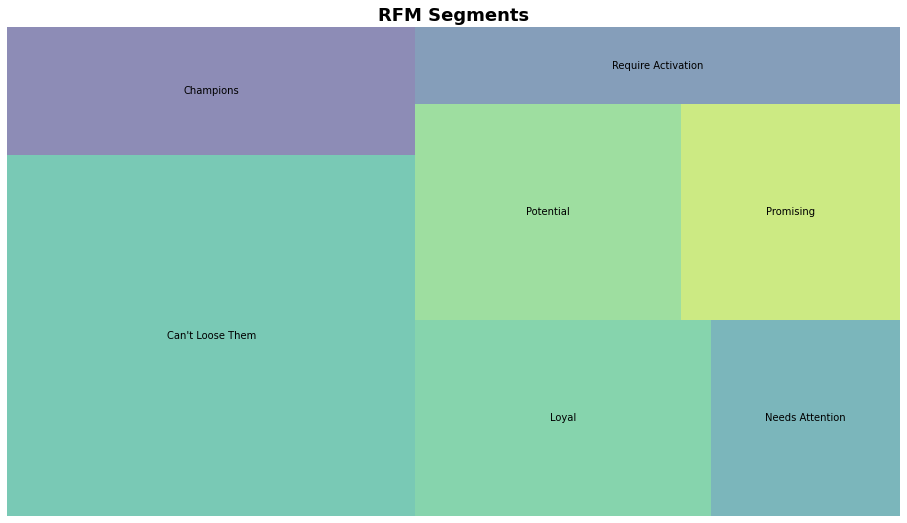

In [50]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()